### Condições Iniciais e de Contorno

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
L = 100  # Comprimento da barra (m)
alpha = 1  # Difusividade térmica
T0 = 10  # Temperatura inicial (°C)
N = 100  # Número de termos na série


### Função para calcular os coeficientes Cn

In [41]:

def calcular_coeficientes_Cn(N, L, T0):
    coeficientes = np.zeros(N)
    for n in range(1, N + 1):
        coeficientes[n - 1] = (20 * (1 - (-1) ** n) / (n * np.pi)) 
    return coeficientes


### Função para calcular a temperatura em um ponto (x, t)

In [42]:
def calcular_temperatura(x, t, coeficientes, L, alpha):
    temperatura = 0
    for n in range(1, len(coeficientes) + 1):
        exponencial = np.exp(-((n * np.pi * alpha / L) ** 2 * t))
        seno = np.sin((n * np.pi * x) / L)
        temperatura += coeficientes[n - 1] * exponencial * seno
    return temperatura

### Calcular os coeficientes Cn

In [43]:
coeficientes_Cn = calcular_coeficientes_Cn(N, L, T0)

# Parâmetros para o grid
nx = 100  # Número de pontos no eixo x
nt = 1000  # Número de pontos no tempo
x_values = np.linspace(0, L, nx) # Eixo da Posicao
t_values = np.linspace(0, 10, nt) # Eixo do Tempo

# Calcular a temperatura ao longo do tempo
temperaturas = np.zeros((nt, nx))
for i, t in enumerate(t_values):
    for j, x in enumerate(x_values):
        temperaturas[i, j] = calcular_temperatura(x, t, coeficientes_Cn, L, alpha)

### Plotagem do gráfico

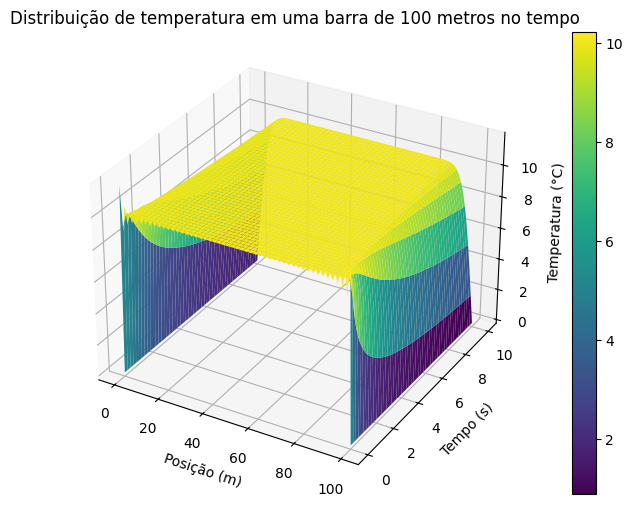

In [44]:

X, T = np.meshgrid(x_values, t_values) # Criando Grade Tridimensional
fig = plt.figure(figsize=(12, 6)) # Criando figura com tamanho de 10 x 6 polegadas
ax = fig.add_subplot(111, projection='3d') # Informa que é uma figura tridimencional
superficie = ax.plot_surface(X, T, temperaturas, cmap='viridis') # Desenha uma superficie tridimencional
ax.set_xlabel('Posição (m)')
ax.set_ylabel('Tempo (s)')  
ax.set_zlabel('Temperatura (°C)') 
ax.set_title(f'Distribuição de temperatura em uma barra de {L} metros no tempo')
plt.colorbar(superficie)
plt.show()